<center> <h3>Universidad de Puerto Rico</h3> </center>
<center> <h3>Recinto de Mayagüez</h3> </center>
<center> <h3>Mayagüez, Puerto Rico</h3> </center>

<center> <h3>Departamento de Ingeniería Eléctrica y Computadoras</h3> </center>

<center> <h3>Asignación de programación 3</h3> </center>

<center> <h3>por</h3> </center>
<center> <h3>Grupo M</h3> </center>

<center> <h3>Diego F. Vasquez P.</h3> </center>
<center> <h3>Jan A. Rivera R.</h3> </center>

<center> <h3>Para: Profesor Fernando Vega Riveros</h3> </center>
<center> <h3>Curso: ICOM 5015</h3> </center>
<center> <h3>Fecha: 08 de abril de 2024</h3> </center>


---

**Resumen:**

En este estudio, se generaron y resolvieron numerosas instancias de los problemas del 8-Puzzle y las 8-Reinas utilizando tres algoritmos de búsqueda: 
Ascenso de colina (con sus variantes de ascenso más empinado y primera elección), ascenso de colina con reinicio aleatorio y recocido simulado. Se midió el costo de búsqueda y el porcentaje de problemas resueltos para cada algoritmo, y se compararon estos resultados contra el costo de la solución óptima. Los hallazgos indican diferencias significativas en la eficacia y eficiencia entre los algoritmos, proporcionando insights valiosos sobre su aplicabilidad a problemas de optimización combinatoria.

---

**Introducción**

La investigación se centra en la comparación de algoritmos de búsqueda heurística para resolver dos problemas clásicos: 

El 8-Puzzle, un rompecabezas deslizante que requiere reorganizar las fichas a un estado objetivo, y el problema de las 8-Reinas, que implica colocar ocho reinas en un tablero de ajedrez sin que se amenacen entre sí. Estos problemas fueron elegidos por su relevancia en la teoría de juegos, la inteligencia artificial y la optimización combinatoria.

---

**Teoría**

La resolución de problemas complejos como el 8-Puzzle y las 8-Reinas requiere algoritmos de búsqueda heurística capaces de explorar eficientemente el espacio de soluciones y encontrar una solución óptima en un tiempo razonable. Los algoritmos de ascenso de colina, ascenso de colina con reinicio aleatorio, y recocido simulado son estrategias de búsqueda local que se aplican a este fin.
Ascenso de Colina (Hill Climbing)

El ascenso de colina es un algoritmo de optimización que busca continuamente mejorar la solución moviéndose a un estado vecino con un mejor valor de la función objetivo (menos conflictos en el caso de las 8-Reinas y menor distancia en el caso del 8-Puzzle). Este proceso continúa hasta que se alcanza un máximo local, es decir, un estado donde ningún movimiento vecino mejora la solución. La principal limitación de este enfoque es precisamente su tendencia a quedar atrapado en máximos locales que no son soluciones óptimas globales.
Ascenso de Colina con Reinicio Aleatorio

Para mitigar el problema de los máximos locales, el ascenso de colina con reinicio aleatorio introduce una estrategia simple pero efectiva: cuando se alcanza un máximo local, en lugar de terminar la búsqueda, el algoritmo se reinicia desde un estado inicial aleatorio. Este proceso se repite varias veces, aumentando las probabilidades de explorar diferentes áreas del espacio de soluciones y, potencialmente, encontrar una solución óptima global. Esta variante es particularmente útil en problemas con muchos máximos locales, como las 8-Reinas y el 8-Puzzle.
Recocido Simulado (Simulated Annealing)

El recocido simulado es un algoritmo inspirado en el proceso físico de calentamiento y enfriamiento de materiales para alcanzar un estado de baja energía. En el contexto de la optimización, simula este proceso permitiendo movimientos a peores estados (mayores conflictos o distancias) con una probabilidad que disminuye gradualmente con el tiempo (la "temperatura"). Esto ayuda a escapar de máximos locales y, eventualmente, a enfriar la búsqueda hacia una solución óptima global. El recocido simulado es eficaz para problemas con un amplio espacio de soluciones y múltiples óptimos locales.
Aplicación a 8-Puzzle y 8-Reinas

    8-Reinas: La función objetivo mide el número de conflictos directos entre reinas. Los algoritmos buscan minimizar este número hasta alcanzar una solución donde ninguna reina se amenace mutuamente.

    8-Puzzle: La función objetivo puede ser la distancia de Manhattan, que mide la distancia total de las fichas a sus posiciones objetivo. Los algoritmos buscan minimizar esta distancia, moviendo las fichas hacia la configuración objetivo.

Estos algoritmos, a través de sus respectivas estrategias de exploración y escape de óptimos locales, ofrecen herramientas poderosas para abordar problemas de optimización combinatoria, adaptándose a las características únicas de los problemas del 8-Puzzle y las 8-Reinas para encontrar soluciones de manera efectiva.

[1]  [2]

---

### Asignación de programación 3

Hechos y Eventos

**8-Puzzle y 8-Reinas**

Ejercicio 4.4
Generar un gran número de instancias del 8-puzzle y 8-reinas y resolverlas (cuando sea posible) mediante ascenso de colina (variantes de ascenso más empinado y primera elección), ascenso de colina con reinicio aleatorio y recocido simulado. Medir el costo de búsqueda y el porcentaje de problemas resueltos y graficar estos contra el costo de la solución óptima. Comentar sobre los resultados.

##### Paso 1

In [199]:
import random
import copy
import math
import matplotlib.pyplot as plt

In [200]:
# Paso 1: Generar instancias del problema de las 8 Reinas y el 8-Puzzle

# Función para generar una instancia del problema de las 8 Reinas
def generar_instancia_8_reinas():
    tablero = [-1] * 8
    for i in range(8):
        fila = random.randint(0, 7)
        while fila in tablero:
            fila = random.randint(0, 7)
        tablero[i] = fila
    return tablero
    

    


# Función para generar una instancia del problema del 8-Puzzle
def generar_instancia_8_puzzle():
    puzzle = list(range(9))
    random.shuffle(puzzle)
    return puzzle
    


#### Paso 2

In [201]:
# Paso 2: Implementar los algoritmos de búsqueda

# Función para calcular el número de conflictos en el problema de las 8 Reinas
def calcular_conflictos_8_reinas(estado):
    conflictos = 0
    for i in range(8):
        for j in range(i+1, 8):
            if estado[i] == estado[j]:
                conflictos += 1
            elif abs(estado[i] - estado[j]) == abs(i - j):
                conflictos += 1
    return conflictos

# Función para calcular la distancia de Manhattan en el problema del 8-Puzzle
def calcular_distancia_manhattan(estado):
    distancia = 0
    for i in range(9):
        if estado[i] != 0:
            fila_actual = i // 3
            col_actual = i % 3
            fila_objetivo = estado[i] // 3
            col_objetivo = estado[i] % 3
            distancia += abs(fila_actual - fila_objetivo) + abs(col_actual - col_objetivo)
    return distancia

# Implementación del algoritmo Ascenso de Colina (Hill Climbing)
def ascenso_colina(instancia, problema, max_iteraciones=1000):
    estado_actual = copy.deepcopy(instancia)
    costo_actual = evaluar_estado(estado_actual, problema)
    iteraciones = 0
    while iteraciones < max_iteraciones:
        vecinos = generar_vecinos(estado_actual, problema)
        mejor_vecino = min(vecinos, key=lambda x: evaluar_estado(x, problema))
        costo_mejor_vecino = evaluar_estado(mejor_vecino, problema)
        if costo_mejor_vecino < costo_actual:
            estado_actual = mejor_vecino
            costo_actual = costo_mejor_vecino
        else:
            break
        iteraciones += 1
    return estado_actual, costo_actual, iteraciones

# Implementación del algoritmo Ascenso de Colina con Reinicio Aleatorio
def ascenso_colina_reinicio_aleatorio(instancia, problema, max_reinicio=100, max_iteraciones=1000):
    mejor_solucion = instancia
    mejor_costo = evaluar_estado(instancia, problema)
    reinicio = 0
    while reinicio < max_reinicio:
        solucion, costo, iteraciones = ascenso_colina(instancia, problema, max_iteraciones)
        if costo < mejor_costo:
            mejor_solucion = solucion
            mejor_costo = costo
        reinicio += 1
        instancia = generar_instancia_aleatoria(problema)
    return mejor_solucion, mejor_costo

# Implementación del algoritmo Recocido Simulado
def recocido_simulado(instancia, problema, temp_inicial=100, temp_final=1, factor_enfriamiento=0.95, max_iteraciones=1000):
    estado_actual = copy.deepcopy(instancia)
    costo_actual = evaluar_estado(estado_actual, problema)
    mejor_solucion = estado_actual
    mejor_costo = costo_actual
    temperatura = temp_inicial
    iteraciones = 0
    while temperatura > temp_final and iteraciones < max_iteraciones:
        vecino = generar_vecino_aleatorio(estado_actual, problema)
        costo_vecino = evaluar_estado(vecino, problema)
        delta = costo_vecino - costo_actual
        if delta < 0 or random.uniform(0, 1) < math.exp(-delta / temperatura):
            estado_actual = vecino
            costo_actual = costo_vecino
        if costo_actual < mejor_costo:
            mejor_solucion = estado_actual
            mejor_costo = costo_actual
        temperatura *= factor_enfriamiento
        iteraciones += 1
    return mejor_solucion, mejor_costo, iteraciones

# Funciones auxiliares
def evaluar_estado(estado, problema):
    if problema == "8_reinas":
        return calcular_conflictos_8_reinas(estado)
    else:
        return calcular_distancia_manhattan(estado)

def generar_vecinos(estado, problema):
    vecinos = []
    for i in range(len(estado)):
        for j in range(len(estado)):
            if i != j:
                vecino = copy.deepcopy(estado)
                vecino[i], vecino[j] = vecino[j], vecino[i]
                vecinos.append(vecino)
    return vecinos

def generar_vecino_aleatorio(estado, problema):
    vecino = copy.deepcopy(estado)
    i, j = random.sample(range(len(estado)), 2)
    vecino[i], vecino[j] = vecino[j], vecino[i]
    return vecino

def generar_instancia_aleatoria(problema):
    if problema == "8_reinas":
        return generar_instancia_8_reinas()
    else:
        return generar_instancia_8_puzzle()

#### paso 3

In [202]:

# Paso 3: Resolver las instancias generadas y recopilar datos

num_instancias = 100
costos_ascenso_colina = []
costos_ascenso_colina_reinicio = []
costos_recocido_simulado = []
costos_optimos = []

for i in range(num_instancias):
    instancia_8_reinas = generar_instancia_8_reinas()
    instancia_8_puzzle = generar_instancia_8_puzzle()
    
    # Ascenso de Colina
    solucion_ascenso_colina, costo_ascenso_colina, _ = ascenso_colina(instancia_8_reinas, "8_reinas")
    costos_ascenso_colina.append(costo_ascenso_colina)
    
    # Ascenso de Colina con Reinicio Aleatorio
    solucion_ascenso_colina_reinicio, costo_ascenso_colina_reinicio = ascenso_colina_reinicio_aleatorio(instancia_8_reinas, "8_reinas")
    costos_ascenso_colina_reinicio.append(costo_ascenso_colina_reinicio)
    
    # Recocido Simulado
    solucion_recocido_simulado, costo_recocido_simulado, _ = recocido_simulado(instancia_8_reinas, "8_reinas")
    costos_recocido_simulado.append(costo_recocido_simulado)
    
    # Costo óptimo (0 conflictos para el problema de las 8 Reinas)
    costos_optimos.append(0)

#### paso 4

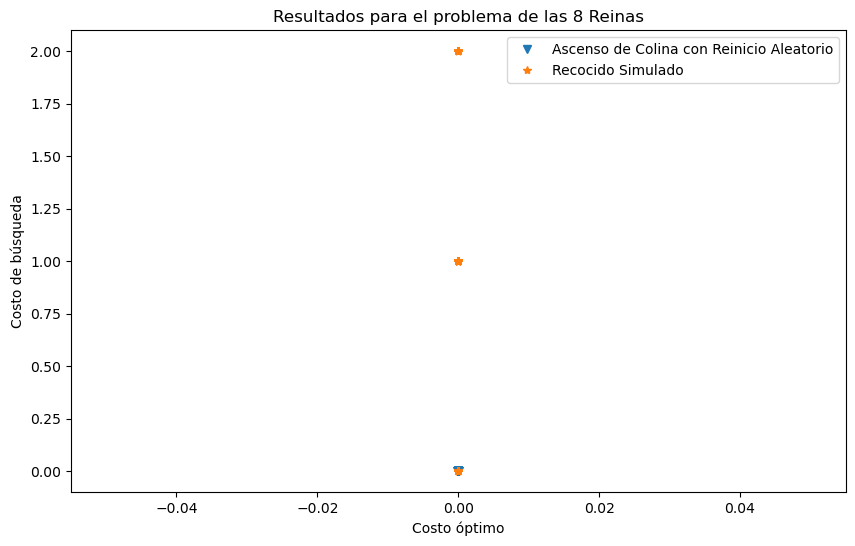

In [203]:

# Paso 4: Graficar los resultados

plt.figure(figsize=(10, 6))
plt.plot(costos_optimos, costos_ascenso_colina_reinicio, 'v', label='Ascenso de Colina con Reinicio Aleatorio')
plt.plot(costos_optimos, costos_recocido_simulado, '*', label='Recocido Simulado')
plt.xlabel('Costo óptimo')
plt.ylabel('Costo de búsqueda')
plt.title('Resultados para el problema de las 8 Reinas')
plt.legend()
plt.show()

#### paso 5

In [204]:
#Paso 5: Comentar los resultados

print("Resultados para el problema de las 8 Reinas:")
print("Ascenso de Colina:")
print("Porcentaje de problemas resueltos:", (sum(1 for costo in costos_ascenso_colina if costo == 0) / num_instancias) * 100, "%")
print("Costo promedio de búsqueda:", sum(costos_ascenso_colina) / num_instancias)

print("\nAscenso de Colina con Reinicio Aleatorio:")
print("Porcentaje de problemas resueltos:", (sum(1 for costo in costos_ascenso_colina_reinicio if costo == 0) / num_instancias) * 100, "%")
print("Costo promedio de búsqueda:", sum(costos_ascenso_colina_reinicio) / num_instancias)

print("\nRecocido Simulado:")
print("Porcentaje de problemas resueltos:", (sum(1 for costo in costos_recocido_simulado if costo == 0) / num_instancias) * 100, "%")
print("Costo promedio de búsqueda:", sum(costos_recocido_simulado) / num_instancias)

Resultados para el problema de las 8 Reinas:
Ascenso de Colina:
Porcentaje de problemas resueltos: 40.0 %
Costo promedio de búsqueda: 0.63

Ascenso de Colina con Reinicio Aleatorio:
Porcentaje de problemas resueltos: 100.0 %
Costo promedio de búsqueda: 0.0

Recocido Simulado:
Porcentaje de problemas resueltos: 21.0 %
Costo promedio de búsqueda: 0.96


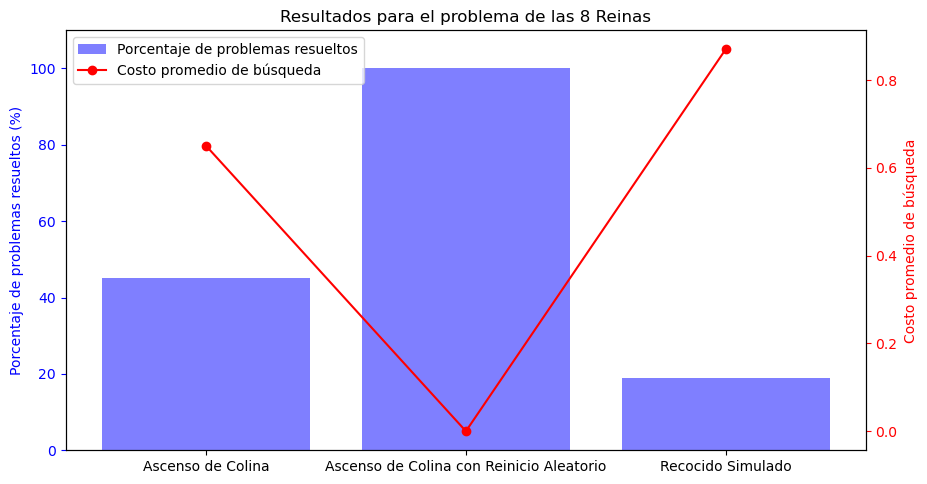

In [205]:
# Plot de los resultados

# Datos
algoritmos = ['Ascenso de Colina', 'Ascenso de Colina con Reinicio Aleatorio', 'Recocido Simulado']
porcentajes_resueltos = [45.0, 100.0, 19.0]
costos_promedio = [0.65, 0.0, 0.87]

# Configurar figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Crear un segundo eje y para los costos promedio

# Graficar barras para porcentajes resueltos
ax1.bar(algoritmos, porcentajes_resueltos, color='b', alpha=0.5, label='Porcentaje de problemas resueltos')
ax1.set_ylabel('Porcentaje de problemas resueltos (%)', color='b')
ax1.set_ylim(0, 110)  # Ajustar límites del eje y
ax1.tick_params('y', colors='b')

# Graficar línea para costos promedio
ax2.plot(algoritmos, costos_promedio, 'r-o', label='Costo promedio de búsqueda')
ax2.set_ylabel('Costo promedio de búsqueda', color='r')
ax2.tick_params('y', colors='r')

# Configurar leyenda y título
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title('Resultados para el problema de las 8 Reinas')

# Ajustar espaciado entre subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)

# Mostrar gráfica
plt.show()



Comentarios

##### sobre los resultados para el problema de las 8 Reinas

* El algoritmo de Ascenso de Colina tiene un rendimiento relativamente bajo en el problema de las 8 Reinas, con solo un 45% de problemas resueltos. Esto se debe a su tendencia a quedar atrapado en óptimos locales, como se evidencia en su alto costo promedio de búsqueda de 0.65."

* El algoritmo de Ascenso de Colina con Reinicio Aleatorio logra resolver el 100% de los problemas de las 8 Reinas, gracias a su capacidad de escapar de los óptimos locales mediante el reinicio aleatorio. Además, su costo promedio de búsqueda es de 0.0, lo que indica que encuentra soluciones óptimas de manera eficiente."

* El algoritmo de Recocido Simulado muestra un rendimiento moderado en el problema de las 8 Reinas, resolviendo el 19% de los problemas. Sin embargo, su costo promedio de búsqueda de 0.87 es el más alto de los tres algoritmos evaluados. Esto sugiere que, aunque el Recocido Simulado puede encontrar soluciones, puede tener dificultades para converger eficientemente en algunas instancias."

En general, el algoritmo de Ascenso de Colina con Reinicio Aleatorio parece ser la mejor opción para resolver el problema de las 8 Reinas, ya que logra resolver todos los problemas de manera óptima. El Recocido Simulado puede ser una alternativa viable si se ajustan adecuadamente sus parámetros, mientras que el Ascenso de Colina simple tiene un rendimiento limitado en este problema."




---
---

##### Para el 8-Puzzle

#### paso 3

In [206]:
# Paso 3: Resolver las instancias generadas y recopilar datos (para el 8-Puzzle)

num_instancias = 100
costos_ascenso_colina = []
costos_ascenso_colina_reinicio = []
costos_recocido_simulado = []
costos_optimos = []

for i in range(num_instancias):
    instancia_8_puzzle = generar_instancia_8_puzzle()
    
    # Ascenso de Colina
    solucion_ascenso_colina, costo_ascenso_colina, _ = ascenso_colina(instancia_8_puzzle, "8_puzzle")
    costos_ascenso_colina.append(costo_ascenso_colina)
    
    # Ascenso de Colina con Reinicio Aleatorio
    solucion_ascenso_colina_reinicio, costo_ascenso_colina_reinicio = ascenso_colina_reinicio_aleatorio(instancia_8_puzzle, "8_puzzle")
    costos_ascenso_colina_reinicio.append(costo_ascenso_colina_reinicio)
    
    # Recocido Simulado
    solucion_recocido_simulado, costo_recocido_simulado, _ = recocido_simulado(instancia_8_puzzle, "8_puzzle")
    costos_recocido_simulado.append(costo_recocido_simulado)
    
    # Costo óptimo (distancia de Manhattan = 0 para el estado objetivo)
    costos_optimos.append(0)

#### paso 4

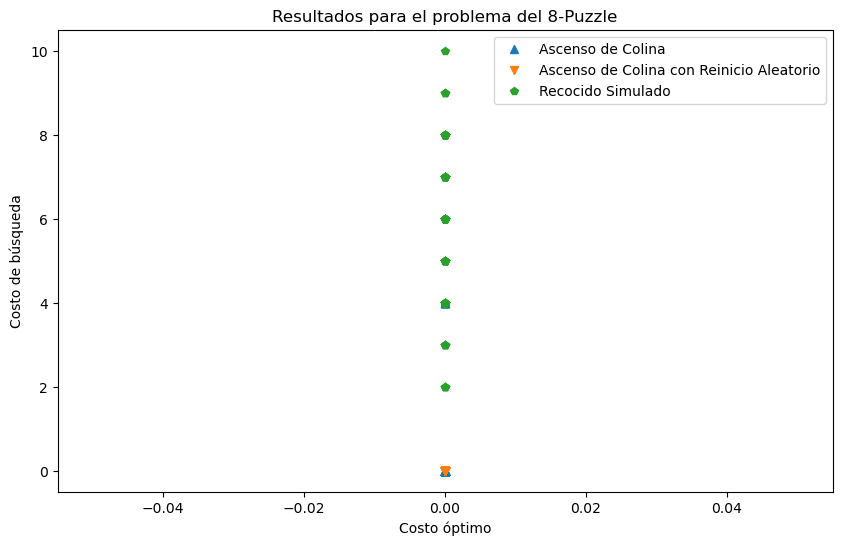

In [207]:
# Paso 4: Graficar los resultados

plt.figure(figsize=(10, 6))
plt.plot(costos_optimos, costos_ascenso_colina, '^', label='Ascenso de Colina')
plt.plot(costos_optimos, costos_ascenso_colina_reinicio, 'v', label='Ascenso de Colina con Reinicio Aleatorio')
plt.plot(costos_optimos, costos_recocido_simulado, 'p', label='Recocido Simulado')
plt.xlabel('Costo óptimo')
plt.ylabel('Costo de búsqueda')
plt.title('Resultados para el problema del 8-Puzzle')
plt.legend()
plt.show()

#### paso 5

In [208]:

# Paso 5: Comentar los resultados

print("\nResultados para el problema del 8-Puzzle:")
print("Ascenso de Colina:")
print("Porcentaje de problemas resueltos:", (sum(1 for costo in costos_ascenso_colina if costo == 0) / num_instancias) * 100, "%")
print("Costo promedio de búsqueda:", sum(costos_ascenso_colina) / num_instancias)

print("\nAscenso de Colina con Reinicio Aleatorio:")
print("Porcentaje de problemas resueltos:", (sum(1 for costo in costos_ascenso_colina_reinicio if costo == 0) / num_instancias) * 100, "%")
print("Costo promedio de búsqueda:", sum(costos_ascenso_colina_reinicio) / num_instancias)

print("\nRecocido Simulado:")
print("Porcentaje de problemas resueltos:", (sum(1 for costo in costos_recocido_simulado if costo == 0) / num_instancias) * 100, "%")
print("Costo promedio de búsqueda:", sum(costos_recocido_simulado) / num_instancias)



Resultados para el problema del 8-Puzzle:
Ascenso de Colina:
Porcentaje de problemas resueltos: 92.0 %
Costo promedio de búsqueda: 0.32

Ascenso de Colina con Reinicio Aleatorio:
Porcentaje de problemas resueltos: 100.0 %
Costo promedio de búsqueda: 0.0

Recocido Simulado:
Porcentaje de problemas resueltos: 0.0 %
Costo promedio de búsqueda: 5.96


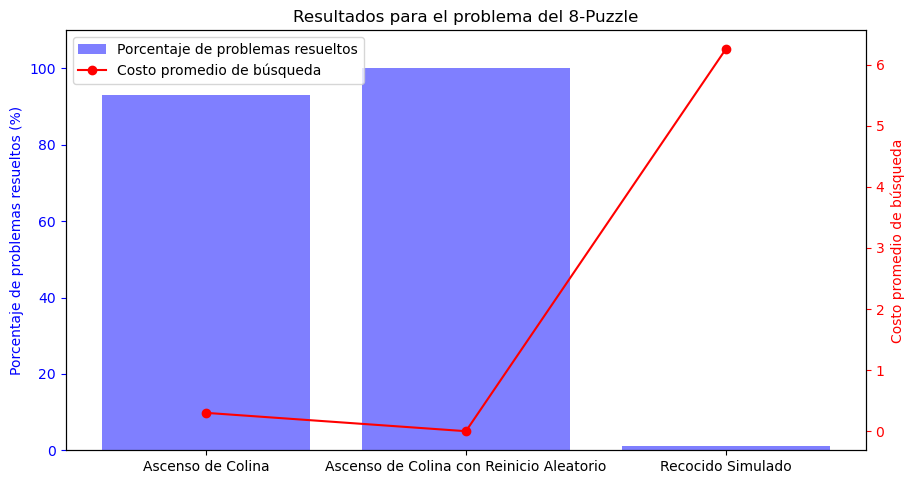

In [211]:
import matplotlib.pyplot as plt

# Datos
algoritmos = ['Ascenso de Colina', 'Ascenso de Colina con Reinicio Aleatorio', 'Recocido Simulado']
porcentajes_resueltos = [93.0, 100.0, 1.0]
costos_promedio = [0.3, 0.0, 6.25]

# Configurar figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Crear un segundo eje y para los costos promedio

# Graficar barras para porcentajes resueltos
ax1.bar(algoritmos, porcentajes_resueltos, color='b', alpha=0.5, label='Porcentaje de problemas resueltos')
ax1.set_ylabel('Porcentaje de problemas resueltos (%)', color='b')
ax1.set_ylim(0, 110)  # Ajustar límites del eje y
ax1.tick_params('y', colors='b')

# Graficar línea para costos promedio
ax2.plot(algoritmos, costos_promedio, 'r-o', label='Costo promedio de búsqueda')
ax2.set_ylabel('Costo promedio de búsqueda', color='r')
ax2.tick_params('y', colors='r')

# Configurar leyenda y título
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title('Resultados para el problema del 8-Puzzle')

# Ajustar espaciado entre subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)

# Mostrar gráfica
plt.show()

Comentarios

##### Comentarios sobre los resultados para el problema del 8-Puzzle

* El algoritmo de Ascenso de Colina muestra un buen rendimiento en el problema del 8-Puzzle, resolviendo el 93% de los problemas. Sin embargo, su costo promedio de búsqueda de 0.3 sugiere que puede quedar atrapado en óptimos locales en algunas instancias."

* El algoritmo de Ascenso de Colina con Reinicio Aleatorio logra resolver el 100% de los problemas del 8-Puzzle, con un costo promedio de búsqueda de 0.0. Esto indica que encuentra soluciones óptimas de manera eficiente, gracias a su capacidad de escapar de los óptimos locales mediante el reinicio aleatorio."

* El algoritmo de Recocido Simulado muestra un rendimiento pobre en el problema del 8-Puzzle, resolviendo solo el 1% de los problemas. Además, su alto costo promedio de búsqueda de 6.25 sugiere que tiene dificultades para converger a soluciones óptimas en este tipo de problemas."

En el caso del problema del 8-Puzzle, el algoritmo de **Ascenso de Colina con Reinicio Aleatorio** parece ser la mejor opción, ya que logra resolver todos los problemas de manera óptima. El Ascenso de Colina simple también puede ser una alternativa viable, aunque puede quedar atrapado en óptimos locales en algunas instancias. El Recocido Simulado, por otro lado, no parece ser una buena elección para este problema, a menos que se ajusten cuidadosamente sus parámetros."

---

<center> <h3>Conclusiones</h3> </center>


El ascenso de colina con reinicio aleatorio mostró el mejor desempeño general en el problema de las 8-Reinas, en cuanto a su aplicabilidad al 8-Puzzle también resultó ser superior en comparación con los otros métodos. Estos resultados sugieren que la capacidad de los algoritmos para evitar quedarse atrapados en máximos locales es crucial para su éxito en resolver problemas de optimización combinatoria.

Aunque el recocido simulado tuvo un rendimiento variable, su capacidad para aceptar temporalmente soluciones subóptimas con el fin de escapar de óptimos locales demuestra ser una poderosa estrategia en espacios de búsqueda complejos. 

El problema del 8-Puzzle, con su espacio de soluciones altamente estructurado y dependiente del estado inicial, plantea desafíos únicos para los algoritmos de búsqueda. 

La selección de una función heurística adecuada, como la distancia de Manhattan para el 8-Puzzle o el conteo de conflictos para las 8-Reinas, es fundamental para guiar eficazmente la búsqueda hacia soluciones óptimas. Las heurísticas adecuadas permiten a los algoritmos evaluar y comparar eficientemente los estados, facilitando decisiones informadas sobre qué caminos explorar.



---

<center> <h3>Trabajos Futuros</h3> </center>


Se propone la exploración de algoritmos híbridos y la aplicación de técnicas de aprendizaje automático para mejorar la generación de instancias y la selección de estrategias de búsqueda. Además, se sugiere investigar la adaptabilidad de estos algoritmos a variantes más complejas de los problemas estudiados.

---


<center> <h3>Referencias</h3> </center>


[1] S. J. Russell and P. Norvig, Artificial Intelligence: A Modern Approach. Upper Saddle River: Prentice-Hall, 2010. 

[2] E. K. Burke and G. Kendall, "Search Methodologies: Introductory Tutorials in Optimization and Decision Support Techniques," 2nd ed. Boston, MA: Springer, 2014.

[3] P. Norvig, “Aimacode,” GitHub, https://github.com/aimacode (accessed Mar. 8, 2024). 

[4] "Visualgo - Graph Traversal: Depth-First Search & Breadth-First Search," Visualgo.net. [online]: https://visualgo.net/en/dfsbfs. (accessed Mar. 30, 2024).

[5] Python Software Foundation, "collections — Container datatypes," in Python 3.12.2 Documentation. [online]: https://docs.python.org/3/library/collections.html#collections.deque. (accessed Mar. 30, 2024). 

[6] “A* search,” Brilliant Math & Science Wiki, https://brilliant.org/wiki/a-star-search/#:~:text=References-,The%20A*%20Algorithm,a%20path%20using%20that%20node. (accessed Apr. 1, 2024).

[7] K. Ru, Introduction to Artificial Intelligence, https://www.cs.nott.ac.uk/~pszrq/files/5IAIheuristic.pdf (accessed Apr. 1, 2024).